# Convolutional Neural Networks

"Deep Learning" is a general term that usually refers to the use of neural networks with multiple layers that synthesize the way the human brain learns and makes decisions. A convolutional neural network is a kind of neural network that extracts *features* from matrices of numeric values (often images) by convolving multiple filters over the matrix values to apply weights and identify patterns, such as edges, corners, and so on in an image. The numeric representations of these patterns are then passed to a fully-connected neural network layer to map the features to specific classes.

## Basic Neural Network Recap

Your brain works by connecting networks of neurons, each of which receives electrochemical stimuli from multiple inputs, which cause the neuron to fire under certain conditions. When a neuron fires, it creates an electrochemical charge that is passed as an input to one or more other neurons, creating a complex *feed-forward* network made up of layers of neurons that pass the signal on. An artificial neural network uses the same principles but the inputs are numeric values with associated *weights* that reflect their relative importance. The neuron take these input values and weights and applies them to an *activation function* that determines the ouput that the artificial neuron passes onto the next layer:

<br/>
<div align="center" style='font-size:24px;'>&#8694;&#9711;&rarr;</div>

As the human brain learns from experience, the inputs to the neurons are strenghtened or weakened depending on their importance to the decisions that the brain needs to make in response to stimuli. Similarly, you train an artificial neural network using a supervised lear
ning technique in which a *loss function* is used to evaluate how well the multi-layered model detects known labels. You can then find the derivative of the loss function to determine whether the level of error (loss) is reduced by increasing or decreasing the weights associated with the inputs, and then apply *backpropagation* to adjust the weights and improve the model iteratively over multiple training *epochs*. The result of this training is a deep learning model that consists of:
* An *input* layer to which the initial input variables are passed.
* One or more *hidden* layers in which the weights optimized by training determine the signal that is fed forward through the network.
* An *output* layer that presents the results.

## Convolutional Neural Networks (CNNs)
Convolutional Neural Networks, or *CNNs*, are a particular type of artificial neural network that works well with matrix inputs, such as images (which are fundamentally just multi-dimensional matrices of pixel intensity values). There are various kinds of layer in a CNN, but a common architecture is to build a sequence of *convolutional* layers that find patterns in indvidual areas of the input matrix and *pooling* layers that aggregate these patterns. Additionally, some layers may *drop* data (which helps avoid *overfitting* the model to the training data), and finally some layers will *flatten* the matrix data and a linear *dense*, or *fully connected* layer will perform classification and reshape the predictions to conform with the expected output format.

Conceptually, a Convolutional Neural Network for image classification is made up of multiple layers that extract features, such as edges, corners, etc; followed by one or more fully-connected layers to classify objects based on these features. You can visualize this like this:

<table>
    <tr><td rowspan=2 style='border: 1px solid black;'>&#x21d2;</td><td style='border: 1px solid black;'>Convolutional Layer</td><td style='border: 1px solid black;'>Pooling Layer</td><td style='border: 1px solid black;'>Convolutional Layer</td><td style='border: 1px solid black;'>Pooling Layer</td><td style='border: 1px solid black;'>Drop Layer</td><td style='border: 1px solid black;'>Fully Connected Layer</td><td rowspan=2 style='border: 1px solid black;'>&#x21d2;</td></tr>
    <tr><td colspan=5 style='border: 1px solid black; text-align:center;'>Feature Extraction</td><td style='border: 1px solid black; text-align:center;'>Classification</td></tr>
</table>

*Note: In Machine Learning, particularly "deep learning", matrices used in neural networks are often referred to as **tensors**. In a simplistic (which is to say, not strictly accurate) sense, a tensor is just a generalized term for a multi-dimensional matrix. In some deep learning frameworks, like PyTorch, a tensor is a specific type of data structure with properties and methods that support deep learning operations.*

### Convolutional Layers
Convolutional layers apply filters to a subregion of the input image, and *convolve* the filter across the image to extract features (such as edges, corners, etc.). For example, suppose the following matrix represents the pixels in a 6x6 image:

$$\begin{bmatrix}255 & 255 & 255 & 255 & 255 & 255\\255 & 255 & 0 & 0 & 255 & 255\\255 & 0 & 0 & 0 & 0 & 255\\255 & 0 & 0 & 0 & 0 & 255\\255 & 255 & 0 & 0 & 255 & 255\\255 & 255 & 255 & 255 & 255 & 255\end{bmatrix}$$

And let's suppose that a filter matrix is defined as a matrix of *weight* values like this:

$$\begin{bmatrix}0 & 1 & 0\\0 & 1 & 0\\0 & 1 & 0\end{bmatrix}$$

The convolution layer applies the filter to the image matrix one "patch" at a time; so the first operation would apply to the <span style="color:red">red</span> elements below:

$$\begin{bmatrix}\color{red}{255} & \color{red}{255} & \color{red}{255} & 255 & 255 & 255\\\color{red}{255} & \color{red}{255} & \color{red}{0} & 0 & 255 & 255\\\color{red}{255} & \color{red}{0} & \color{red}{0} & 0 & 0 & 255\\255 & 0 & 0 & 0 & 0 & 255\\255 & 255 & 0 & 0 & 255 & 255\\255 & 255 & 255 & 255 & 255 & 255\end{bmatrix}$$

To apply the filter, we multiply the patch area by the filter elementwise, and add the results:

$$\begin{bmatrix}255 & 255 & 255\\255 & 255 & 0\\255 & 0 & 0\end{bmatrix} \times \begin{bmatrix}0 & 1 & 0\\0 & 1 & 0\\0 & 1 & 0\end{bmatrix}= \begin{bmatrix}(255 \times 0) + (255 \times 1) + (255 \times 0) & +\\ (255 \times 0) + (255 \times 1) + (0 \times 0) & + \\ (255 \times 0) + (0 \times 1) + (0 \times 0)\end{bmatrix}  = 510$$

This result is then used as the value for the first element of a feature map:

$$\begin{bmatrix}\color{red}{510} & ? & ? & ?\\? & ? & ? & ?\\? & ? & ? & ?\\? & ? & ? & ?\end{bmatrix}$$

Next we move the patch along one pixel and apply the filter to the new patch area:

$$\begin{bmatrix}255 & \color{red}{255} & \color{red}{255} & \color{red}{255} & 255 & 255\\255 & \color{red}{255} & \color{red}{0} & \color{red}{0} & 255 & 255\\255 & \color{red}{0} & \color{red}{0} & \color{red}{0} & 0 & 255\\255 & 0 & 0 & 0 & 0 & 255\\255 & 255 & 0 & 0 & 255 & 255\\255 & 255 & 255 & 255 & 255 & 255\end{bmatrix}$$

$$\begin{bmatrix}255 & 255 & 255\\255 & 0 & 0\\0 & 0 & 0\end{bmatrix} \times \begin{bmatrix}0 & 1 & 0\\0 & 1 & 0\\0 & 1 & 0\end{bmatrix}= \begin{bmatrix}(255 \times 0) + (255 \times 1) + (255 \times 0) & +\\ (255 \times 0) + (0 \times 1) + (0 \times 0) & + \\ (0 \times 0) + (0 \times 1) + (0 \times 0)\end{bmatrix}  = 255 $$

So can fill in that value on our feature map:
$$\begin{bmatrix}510 & \color{red}{255} & ? & ?\\? & ? & ? & ?\\? & ? & ? & ?\\? & ? & ? & ?\end{bmatrix}$$

Then we just repeat the process, moving the patch across the entire image matrix until we have a completed feature map like this:

$$\begin{bmatrix}510 & 255 & 255 & 510\\255 & 0 & 0 & 255\\255 & 0 & 0 & 255\\510 & 255 & 255 & 510\end{bmatrix}$$

You'll have noticed that as a result of convolving a patch across the original image, we've "lost" a 1-pixel strip around the edge. Typically, we apply a *padding* rule to keep the convolved image the same size as the original image, often by simply filling creating a 1-pixel wide edge with 0 values, like this:

$$\begin{bmatrix}0 & 0 & 0 & 0 & 0 & 0\\0 & 510 & 255 & 255 & 510 & 0\\0 & 255 & 0 & 0 & 255 & 0\\0 & 255 & 0 & 0 & 255 & 0\\0 & 510 & 255 & 255 & 510 & 0\\0 & 0 & 0 & 0 & 0 & 0\end{bmatrix}$$

### Pooling Layers
After using one or more convolution layers to create a filter map, you can use a pooling layer to  reduce the number of dimensions in the matrix. A common technique is to use *MaxPooling*, in which a patch is applied to the matrix and the maximum value within the mask is retained while the others are discarded.

For example, we could apply a 2x2 patch to our feature map to extract the largest value in each 2x2 subarea:

$$\begin{bmatrix}\color{blue}{0} & \color{blue}{0} & \color{green}{0} & \color{green}{0} & \color{red}{0} & \color{red}{0}\\\color{blue}{0} & \color{blue}{510} & \color{green}{255} & \color{green}{255} & \color{red}{510} & \color{red}{0}\\\color{magenta}{0} & \color{magenta}{255} & \color{orange}{0} & \color{orange}{0} & \color{cyan}{255} & \color{cyan}{0}\\\color{magenta}{0} & \color{magenta}{255} & \color{orange}{0} & \color{orange}{0} & \color{cyan}{255} & \color{cyan}{0}\\\color{brown}{0} & \color{brown}{510} & 255 & 255 & \color{yellow}{510} & \color{yellow}{0}\\\color{brown}{0} & \color{brown}{0} & 0 & 0 & \color{yellow}{0} & \color{yellow}{0}\end{bmatrix}\Longrightarrow \begin{bmatrix}\color{blue}{510} & \color{green}{255} & \color{red}{510}\\\color{magenta}{255} & \color{orange}{0} & \color{cyan}{255}\\\color{brown}{510} & 255 & \color{yellow}{510}\end{bmatrix}$$

### Activation Functions
After each layer of filtering or pooling, it's common to apply a *rectified linear unit (ReLU)* function to the feature maps that have been produced. This has the effect of ensuring that all values in the feature maps are zero or higher.

### Dense (Fully-Connected) Layers
After the previous layers have created feature maps, a final linear *fully-connected* layer is used to generate class predictions - you can think of the fully-connected layer as being the endpoint of the classifier what determines which combination of features found in the previous layers "adds up" to a particular class. To create a fully-connected layer, the feature maps are flattened into a single 1-dimensional matrix and a function is applied to calculate the probability for each class that the model is designed to predict - usually this final function is a *Sigmoid* or *SoftMax* function that assigns a value between 0 and 1 to each class, with the total of these assignments adding to 1:

$$\begin{bmatrix}510 & 255 & 510\\255 & 0 & 255\\510 & 255 & 510\end{bmatrix}\begin{bmatrix}255 & 255 & 510\\255 & 0 & 255\\510 & 255 & 255\end{bmatrix}...$$

$$ \Downarrow $$

$$\begin{bmatrix}510 & 255 & 510 & 255 & 0 & 255 & 510 & 255 & 510 & 255 & 255 & 510 & 255 & 0 & 255 & 510 & 255 & 255 ...\end{bmatrix}$$

$$ \Downarrow $$

$$\begin{bmatrix}C_{1} & C_{2} & C_{3} \\ 0.15 & 0.8 & 0.05\end{bmatrix}$$

### Backpropagation
When we train a CNN, we perform mulitple passes forward through the network of layers, and then use a *loss function* to measure the difference between the output values (which you may recall are probability predictions for each class) and the actual values for the known image classes used to train the model (in other words, 1 for the correct class and 0 for all the others). For example, in the example above the predicted probabilities are 0.15 for C<sub>1</sub>, 0.8 for C<sub>2</sub>, and 0.05 for C<sub>3</sub>. Let's suppose that the image in question is an example of C<sub>2</sub>, so the expected output is actually 0 for C<sub>1</sub>, 1 for C<sub>2</sub>, and 0 for C<sub>3</sub>. The error (or *loss*) represents how far from the expected values our results are.

Having calculated the loss, the training process uses a specified *optimizer* to calculate the derivitive of the loss function wit respect to the weights and biases used in the network layers, and determine how best to adjust them to reduce the loss. We then go backwards through the network, adjusting the weights before the next forward pass. The degree to which we adjust the weights is determined by the *learning rate* - the larger the learning rate, the bigger the adjustments made to the weights

## Building a CNN
There are several commonly used frameworks for creating CNNs, including *PyTorch*, *Tensorflow*, the *Microsoft Cognitive Toolkit (CNTK)*, and *Keras* (which is a high-level API that can use Tensorflow or CNTK as a back end).

### A Simple Example
The example we'll use Keras to explore this is a classification model that can classify images of geometric shapes.

In [6]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
import os

# The images are in a folder named 'shapes/training'
training_folder_name = 'shapes/training'

# All images are 128x128 pixels
img_size = (128,128)

# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(training_folder_name))
print(classes)

['circle', 'square', 'triangle']


### Set up the Framework
Now that we have our data, we're ready to build a CNN. The first step is to install and configure the framework we want to use.

We're going to use the Keras machine learning framework, so let's install the latest version

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Prepare the Data
Before we can train the model, we need to prepare the data. We'll divide the feature values by 255 to normalize them as floating point values between 0 and 1, and we'll split the data so that we can use 70% of it to train the model, and hold back 30% to validate it. When loading the data, the data generator will assing "hot-encoded" numeric labels to indicate which class each image belongs to based on the subfolders in which the data is stored. In this case, there are three subfolders - *circle*, *square*, and *triangle*, so the labels will consist of three *0* or *1* values indicating which of these classes is associated with the image - for example the label [0 1 0] indicates that the image belongs to the second class (*square*).

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras.preprocessing.image

batch_size = 30

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Getting Data...
Preparing training dataset...
Found 846 images belonging to 3 classes.
Preparing validation dataset...
Found 360 images belonging to 3 classes.


### Define the CNN
Now we're ready to train our model. This involves defining the layers for our CNN, specifying an *optimizer*, and compiling the model for multi-class classification. In this example, we'll use an optimizer based on the *Adam* algorithm and set its *learning rate* parameter (which determines how much the weights are adjusted after backpropagation identifies their affect on loss). These settings can have a significant impact on how well your model (and how quickly) your model learns the optimal weights and bias values required to predict accurately.

> Note: For information about the optimizers available in Keras, see https://keras.io/optimizers/

In [10]:
# Define a CNN classifier network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from keras import optimizers
import tensorflow as tf

#Dense is the fully connected layer
#Flatten is used after all CNN layers and before fully connected layer
#Conv2D is the 2D convolution layer
#MaxPooling2D is the 2D maxx pooling layer

# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution layer and another and max poolinglayer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Now we'll flatten the feature maps and generate an output layer with a predicted probability for each class
model.add(Flatten())
# model.add(Dropout(0.5)) # This is where you could add a dropout layer (most overfitting here)
model.add(Dense(train_generator.num_classes, activation='softmax'))

# We'll use the ADAM optimizer
#other optimizers can also be used for example SGD stochastic gradient descent
opt = tf.optimizers.Adam(learning_rate=0.001)

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 123, 123, 32)   │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,651 (451.76 KB)

 Trainable params: 115,651 (451.76 KB)

 Non-trainable params: 0 (0.00 B)

None


Note the model summary shows the output shape from each layer:
- In the input layer, we pass an image, which is 128x128 pixels x 3 channels.
- A convolution layer then applies 32 6x6 filters. The 6x6 filter loses 5 pixels around the edge of the image, so the output is 123x123x32.
- A pooling layer then applies a 2x2 filter, halving the size of each pixel layer; which when rounded gives us an output of 61x61x32.
- Then another convolution layer uses 32 6x6 filters, losing 5 pixels to produce an output of 56x56x32.
- Another pooling layer halves the pixel dimensions, so now we have 28x28x32.
- When we flatten this, 28x28x32 gives us 25,088 individual values
- Finally, we feed these into a dense layer that produces 3 outputs - a probability value for each of our three classes.

Note that the flattened layer that defines the input to our fully-connected neural network always expects 25,088 values; so working backward from here, our convolutional layers must start with a 128x128 image. Images of a different size or shape will not work with this model.


### Train the Model
With the layers of the CNN defined, we're ready to train the model using our image data. In the example below, we use 5 iterations (*epochs*) to train the model in 30-image batches, holding back 30% of the data for validation. After each epoch, the loss function measures the error (*loss*) in the model and adjusts the weights (which were randomly generated for the first iteration) to try to improve accuracy.

> **Note**: We're only using 5 epochs to reduce the training time for this simple example. A real-world CNN is usually trained over more epochs than this. CNN model training is processor-intensive, so it's recommended to perform this on a system that can leverage GPUs  to reduce training time. Status will be displayed as the training progresses.

In [11]:
# Train the model over 5 epochs
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 270s 10s/step - accuracy: 0.5152 - loss: 1.1294 - val_accuracy: 0.7278 - val_loss: 0.4941
Epoch 2/5
 1/28 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7667 - loss: 0.4392

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - accuracy: 0.7667 - loss: 0.4392 - val_accuracy: 0.7111 - val_loss: 0.5374
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.8380 - loss: 0.3497 - val_accuracy: 0.9694 - val_loss: 0.1704
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 1.0000 - loss: 0.1048 - val_accuracy: 0.8722 - val_loss: 0.2242
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9197 - loss: 0.2128 - val_accuracy: 0.9806 - val_loss: 0.0737


### View the Loss History
We tracked average training and validation loss history for each epoch. We can plot these to verify that loss reduced as the model was trained, and to detect *over-fitting* (which is indicated by a continued drop in training loss after validation loss has levelled out or started to increase.

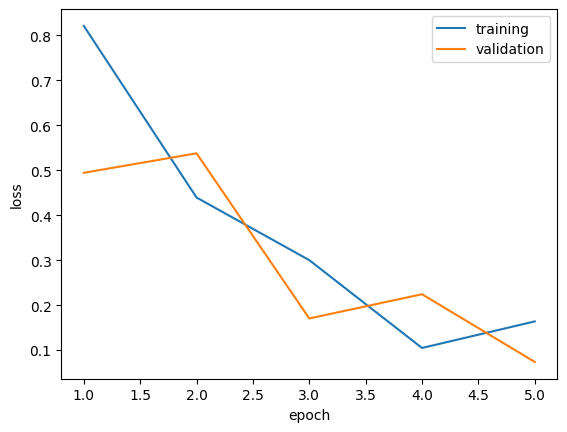

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt

# Get the number of validation loss values recorded during training
num_val_losses = len(history.history["val_loss"])
epoch_nums = range(1, num_val_losses + 1)

training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss[:num_val_losses]) # Plot training loss for the same number of epochs as validation loss
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### Evaluate the model
With our model trained, we'll use it to predict labels for the test data and evaluate its precision, recall, and simple accuracy using the known labels. Then we'll plot the confusion matrix to evaluate how well the model performs for each class label. Keras does not provide a built-in confurion matrix, so we'll use Scikit-Learn.

Generating predictions from validation data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


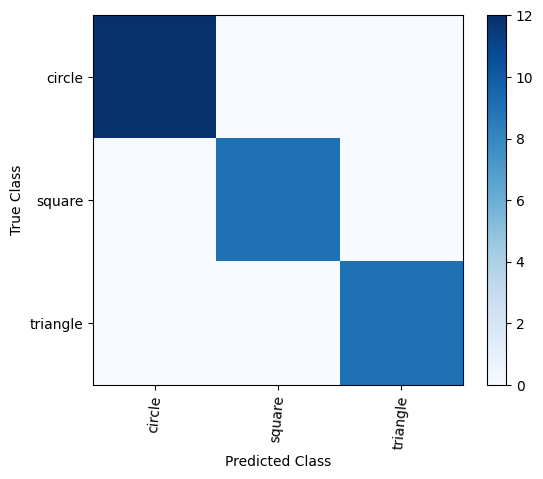

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the moedl to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### Save the Model
Now that we have trained the model, we can save it with the trained weights. Then later, we can reload it and use it to predict classes from new images.

In [14]:
from keras.models import load_model

modelFileName = 'shape-classifier.h5'

model.save(modelFileName) # saves the trained model
print("Model saved.")

del model  # deletes the existing model variable

Model saved.


## Use the Model with New Data
Now that we've trained and evaluated our model, we can use it to predict classes for new images.

### Create Functions to Prepare Data and Get Class Predictions
Let's create a couple of functions to:

- Resize new images to match the size on which the model was trained.
- Submit the new images to the model and retrieve the predicted classes.

In [15]:
# Helper function to resize image
def resize_image(src_img, size=(128,128), bg_color="white"):
    from PIL import Image
    from PIL import ImageOps #Import ImageOps

    # rescale the image so the longest edge is the right size
    # src_img.thumbnail(size, Image.ANTIALIAS) # Deprecated
    src_img = ImageOps.contain(src_img, size, Image.Resampling.LANCZOS)  #Alternative method using ImageOps.contain


    # Create a new image of the right shape
    new_image = Image.new("RGB", size, bg_color)

    # Paste the rescaled image onto the new background
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))

    # return the resized image
    return new_image
# Function to predict the class of an image
def predict_image(classifier, image_array):
    import numpy as np

    # We need to format the input to match the training data
    # The data generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    img_features = image_array.astype('float32')
    img_features /= 255

    # These are the classes our model can predict
    classnames = ['circle', 'square', 'triangle']

    # Predict the class of each input image
    predictions = classifier.predict(img_features)

    predicted_classes = []
    for prediction in predictions:
        # The prediction for each image is the probability for each class, e.g. [0.8, 0.1, 0.2]
        # So get the index of the highest probability
        class_idx = np.argmax(prediction)
        # And append the corresponding class name to the results
        predicted_classes.append(classnames[int(class_idx)])
    # Return the predictions
    return predicted_classes

print("Functions created - ready to use model for inference.")

Functions created - ready to use model for inference.


### Predict Image Classes
Now we're ready to use the model for predicting (often referred to as *inferencing*) the classes of some new images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


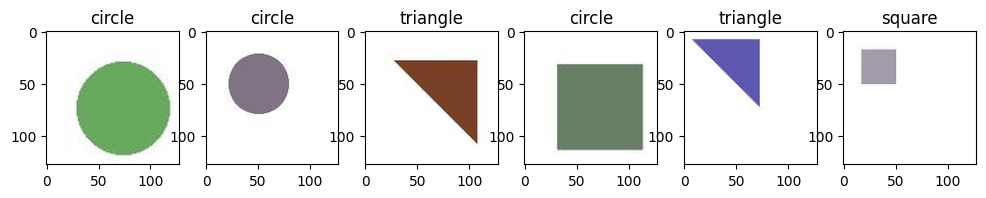

In [16]:
import os
from random import randint
import numpy as np
from PIL import Image
from keras.models import load_model
from matplotlib import pyplot as plt
%matplotlib inline

# load the saved model
modelFileName = 'shape-classifier.h5'
model = load_model(modelFileName)

#get the list of test image files
test_folder = '/content/gdrive/My Drive/IE/Notebooks_s3/data/shapes/test'
test_image_files = os.listdir(test_folder)

# Empty array on which to store the images
image_arrays = []

size = (128,128)
background_color="white"

fig = plt.figure(figsize=(12, 8))

# Get the images and show the predicted classes
for file_idx in range(len(test_image_files)):
    img = Image.open(os.path.join(test_folder, test_image_files[file_idx]))

    # resize the image so it matches the training set - it  must be the same size as the images on which the model was trained
    resized_img = np.array(resize_image(img, size, background_color))

    # Add the image to the array of images
    image_arrays.append(resized_img)

# Get predictions from the array of image arrays
# Note that the model expects an array of 1 or more images - just like the batches on which it was trained
predictions = predict_image(model, np.array(image_arrays))

# plot easch image with its corresponding prediction
for idx in range(len(predictions)):
    a=fig.add_subplot(1,len(predictions),idx+1)
    imgplot = plt.imshow(image_arrays[idx])
    a.set_title(predictions[idx])


## Learn More

Take a look at the [Keras documentation](https://keras.io/)